In [62]:
import numpy as np
import matplotlib.pyplot as plt
import ChurnModelUtils

from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8
import hdbscan
import seaborn as sns
import matplotlib.patheffects as pe


In [63]:
embedding=np.load('embs_hdb.npy')

In [64]:

clusterer = hdbscan.HDBSCAN(min_cluster_size=90, min_samples=63)
clusterer.fit(embedding)
outliers = clusterer.outlier_scores_ > 0.3
noclust= clusterer.probabilities_ < 0.4
excluded=np.logical_or(outliers, noclust)
clusterer.labels_=np.array([lab if (lab>-1 and exc==False) else -1 for lab, exc in zip(clusterer.labels_, excluded)])

Text(0.5, 1.0, 'HDBScan Clustering')

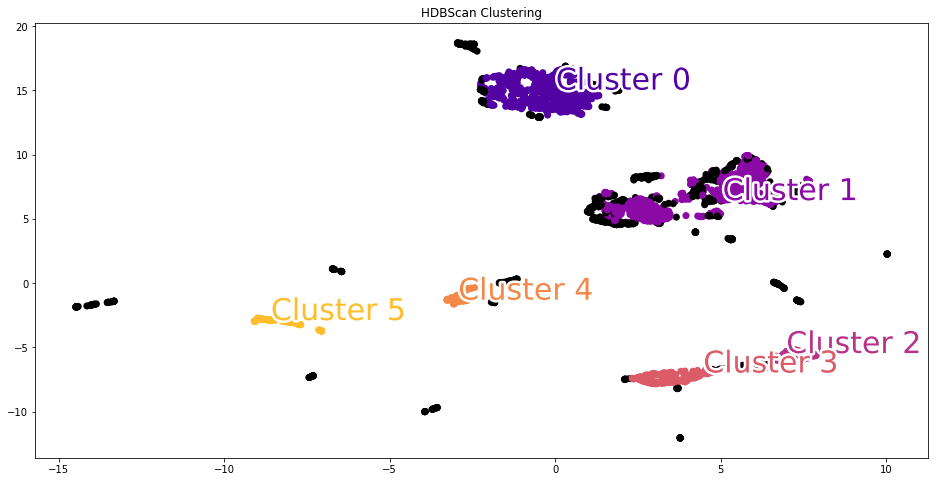

In [65]:
color_palette = sns.color_palette('plasma', clusterer.labels_.max()+1)
cluster_colors = [color_palette[x] if x >= 0
              else (0., 0., 0.)
              for x in clusterer.labels_] 

plt.scatter(*embedding.T, s=50, linewidth=0, c=cluster_colors)#, alpha=0.45)

lbl_set=set()
for_lab={}
for i_col, (col, label) in enumerate(zip(cluster_colors, clusterer.labels_)):
    if not label in lbl_set:
        lbl_set.add(label)
        if label==-1:
            for_lab["Not in cluster"]={"Color":col, "Coordinate":embedding[i_col]}
        else:
            for_lab[f"Cluster {label}"]={"Color":col, "Coordinate":embedding[i_col]}


texts = []
for cluster, vals in for_lab.items():
    if cluster == 'Not in cluster':
        continue
    texts.append(plt.text(vals["Coordinate"][0], vals["Coordinate"][1], s=cluster, color=vals['Color'], fontsize=30,  path_effects=[pe.withStroke(linewidth=5, foreground='w')]))
plt.title('HDBScan Clustering')